# Import libraries

In [45]:
import pandas as pd
import numpy as np

In [46]:
#Reading Data
movie = pd.read_csv(r"C:\Users\Admin\Downloads\movies.csv")
movie

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


# 1.PROBLEM STATEMENT

# Understanding our data

In [47]:
movie.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Column Desciption

In [48]:
movie.info() #Check data types and null-values
categorical = movie.dtypes[movie.dtypes == "object"].index
print(categorical)
movie[categorical].describe()#describe object columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
Index(['MOVIES', 'YEAR', 'GENRE', 'ONE-LINE', 'STARS', 'VOTES', 'Gross'], dtype='object')


,MOVIES,YEAR,GENRE,ONE-LINE,STARS,VOTES,Gross
count,9999,9355,9919,9999,9999,8179,460
unique,6817,438,510,8688,7877,4129,332
top,Bleach: Burîchi,(2020– ),\nComedy,\nAdd a Plot\n,\n,7,$0.01M
freq,65,892,852,1265,456,35,22


In [49]:
movie.shape #number of rows and columns

(9999, 9)

In [50]:
movie.nunique() #to calculate the number of unique (distinct) values in each column

MOVIES      6817
YEAR         438
GENRE        510
RATING        82
ONE-LINE    8688
STARS       7877
VOTES       4129
RunTime      261
Gross        332
dtype: int64

In [51]:
movie.describe() #desribe numeric columns

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


# 2. DATA CLEANING

In [52]:
#Create a copy of our dataset before start to clean
data = movie.copy()
data.sample(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1761,El Recluso,(2018– ),"\nDrama, Thriller",7.0,\nAn American SPEC OPS infiltrates one of Mexi...,\n \n Stars:\nIgnacio Serricchio...,"2,332",60.0,NaN
7217,7Seeds,(2019–2020),"\nAnimation, Action, Adventure",7.8,\nAngo recalls his harsh upbringing in the pro...,"\n \n Stars:\nRyan Anthony, \nLu...",34,26.0,NaN
4130,Kevin Hart's Guide to Black History,(2019 TV Movie),\nComedy,5.5,\nKevin Hart highlights the fascinating contri...,\n Director:\nTom Stern\n| \n Stars:\nSt...,"1,257",62.0,NaN


In [53]:
#Cleaning the whole data set
data.dropna(axis=1, how='all')
data

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [54]:
#Removing the null values in the whole data set
data = data.dropna()
data

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


In [55]:
data.drop_duplicates() #removing duplicate values

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


In [56]:
data.isna()  # Confirming for the null values

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False
125,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5750,False,False,False,False,False,False,False,False,False
5770,False,False,False,False,False,False,False,False,False
5835,False,False,False,False,False,False,False,False,False
6056,False,False,False,False,False,False,False,False,False


Checking and cleaning column with the leading and trailing line and spaces

In [57]:
data['GENRE'].dtype#checking data types
data['GENRE'].unique()#check leading spaces

array(['\nAction, Comedy, Crime            ',
       '\nAction, Adventure, Sci-Fi            ',
       '\nCrime, Horror, Thriller            ',
       '\nAction, Adventure, Drama            ',
       '\nAction, Adventure, Horror            ',
       '\nAdventure, Thriller            ',
       '\nCrime, Drama, Thriller            ',
       '\nDrama, Mystery, Thriller            ',
       '\nAction, Adventure, Comedy            ',
       '\nComedy, Crime, Drama            ',
       '\nAction, Crime, Drama            ',
       '\nAction, Drama            ', '\nHorror            ',
       '\nAdventure, Fantasy            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Thriller            ',
       '\nBiography, Crime, Drama            ',
       '\nDrama, Sci-Fi            ', '\nCrime, Drama            ',
       '\nMusical, Romance            ',
       '\nAction, Adventure, Crime            ',
       '\nAnimation, Adventure, Family            ',
       '\nAction, Adv

In [58]:
data['CLEAN-GENRE'] = data['GENRE'].str.strip()# removing leading and trailing spaces
data['CLEAN-GENRE'].unique()#confirming if the leading spaces removed

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\33762526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLEAN-GENRE'] = data['GENRE'].str.strip()# removing leading and trailing spaces


array(['Action, Comedy, Crime', 'Action, Adventure, Sci-Fi',
       'Crime, Horror, Thriller', 'Action, Adventure, Drama',
       'Action, Adventure, Horror', 'Adventure, Thriller',
       'Crime, Drama, Thriller', 'Drama, Mystery, Thriller',
       'Action, Adventure, Comedy', 'Comedy, Crime, Drama',
       'Action, Crime, Drama', 'Action, Drama', 'Horror',
       'Adventure, Fantasy', 'Comedy, Romance',
       'Action, Adventure, Thriller', 'Biography, Crime, Drama',
       'Drama, Sci-Fi', 'Crime, Drama', 'Musical, Romance',
       'Action, Adventure, Crime', 'Animation, Adventure, Family',
       'Action, Adventure, Fantasy', 'Adventure, Sci-Fi',
       'Drama, Horror, Mystery', 'Comedy', 'Comedy, Fantasy, Romance',
       'Action, Crime, Thriller', 'Biography, Drama, Sport',
       'Action, Drama, Sci-Fi', 'Animation, Drama, Fantasy',
       'Adventure, Horror, Thriller', 'Action, Comedy, War',
       'Family, Fantasy, Musical', 'Comedy, Drama, Romance',
       'Adventure, Drama, 

In [59]:
data['ONE-LINE'].dtype#checking data types
data['ONE-LINE'].unique()#check leading spaces

array(["\nThe world's top bodyguard gets a new client, a hitman who must testify at the International Criminal Court. They must put their differences aside and work together to make it to the trial on time.",
       "\nA pragmatic paleontologist visiting an almost complete theme park is tasked with protecting a couple of kids after a power failure causes the park's cloned dinosaurs to run loose.",
       "\nHoping to walk away with a massive fortune, a trio of thieves break into the house of a blind man who isn't as helpless as he seems.",
       '\nA meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.',
       '\nSix strangers find themselves in a maze of deadly mystery rooms and must use their wits to survive.',
       "\nWhen a killer shark unleashes chaos on a beach community, it's up to a local sheriff, a marine biologist, and an old seafarer to hunt the beast down.",
       '\nAn un

In [60]:
data['CLEAN-ONE-LINE'] = data['ONE-LINE'].str.strip()# removing leading and trailing spaces
data['CLEAN-ONE-LINE'].unique()#confirming if the leading spaces removed

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3388290273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLEAN-ONE-LINE'] = data['ONE-LINE'].str.strip()# removing leading and trailing spaces


array(["The world's top bodyguard gets a new client, a hitman who must testify at the International Criminal Court. They must put their differences aside and work together to make it to the trial on time.",
       "A pragmatic paleontologist visiting an almost complete theme park is tasked with protecting a couple of kids after a power failure causes the park's cloned dinosaurs to run loose.",
       "Hoping to walk away with a massive fortune, a trio of thieves break into the house of a blind man who isn't as helpless as he seems.",
       'A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.',
       'Six strangers find themselves in a maze of deadly mystery rooms and must use their wits to survive.',
       "When a killer shark unleashes chaos on a beach community, it's up to a local sheriff, a marine biologist, and an old seafarer to hunt the beast down.",
       'An undercover cop a

In [61]:
data['STARS'].dtype#checking data types
data['STARS'].unique()#check leading spaces

array(['\n    Director:\nPatrick Hughes\n| \n    Stars:\nRyan Reynolds, \nSamuel L. Jackson, \nGary Oldman, \nElodie Yung\n',
       '\n    Director:\nSteven Spielberg\n| \n    Stars:\nSam Neill, \nLaura Dern, \nJeff Goldblum, \nRichard Attenborough\n',
       '\n    Director:\nFede Alvarez\n| \n    Stars:\nStephen Lang, \nJane Levy, \nDylan Minnette, \nDaniel Zovatto\n',
       '\n    Director:\nPeter Jackson\n| \n    Stars:\nElijah Wood, \nIan McKellen, \nOrlando Bloom, \nSean Bean\n',
       '\n    Director:\nAdam Robitel\n| \n    Stars:\nTaylor Russell, \nLogan Miller, \nJay Ellis, \nTyler Labine\n',
       '\n    Director:\nSteven Spielberg\n| \n    Stars:\nRoy Scheider, \nRobert Shaw, \nRichard Dreyfuss, \nLorraine Gary\n',
       '\n    Director:\nMartin Scorsese\n| \n    Stars:\nLeonardo DiCaprio, \nMatt Damon, \nJack Nicholson, \nMark Wahlberg\n',
       '\n    Director:\nDavid Fincher\n| \n    Stars:\nBen Affleck, \nRosamund Pike, \nNeil Patrick Harris, \nTyler Perry\n',
    

In [62]:
data['STARS'].dtype#checking data types
data['STARS'].unique()#check leading spaces

array(['\n    Director:\nPatrick Hughes\n| \n    Stars:\nRyan Reynolds, \nSamuel L. Jackson, \nGary Oldman, \nElodie Yung\n',
       '\n    Director:\nSteven Spielberg\n| \n    Stars:\nSam Neill, \nLaura Dern, \nJeff Goldblum, \nRichard Attenborough\n',
       '\n    Director:\nFede Alvarez\n| \n    Stars:\nStephen Lang, \nJane Levy, \nDylan Minnette, \nDaniel Zovatto\n',
       '\n    Director:\nPeter Jackson\n| \n    Stars:\nElijah Wood, \nIan McKellen, \nOrlando Bloom, \nSean Bean\n',
       '\n    Director:\nAdam Robitel\n| \n    Stars:\nTaylor Russell, \nLogan Miller, \nJay Ellis, \nTyler Labine\n',
       '\n    Director:\nSteven Spielberg\n| \n    Stars:\nRoy Scheider, \nRobert Shaw, \nRichard Dreyfuss, \nLorraine Gary\n',
       '\n    Director:\nMartin Scorsese\n| \n    Stars:\nLeonardo DiCaprio, \nMatt Damon, \nJack Nicholson, \nMark Wahlberg\n',
       '\n    Director:\nDavid Fincher\n| \n    Stars:\nBen Affleck, \nRosamund Pike, \nNeil Patrick Harris, \nTyler Perry\n',
    

In [63]:
data['CLEAN-STARS'] = data['STARS'].str.strip()# removing leading and trailing ines

data['CLEAN-STARS'] = data['CLEAN-STARS'].str.replace(r'\n| \n |', '', regex=True)#removing leading and trailing lines between values in STARS column 
data['CLEAN-STARS'].unique() #confirming if the leading spaces removed

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\694967076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLEAN-STARS'] = data['STARS'].str.strip()# removing leading and trailing ines
C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\694967076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLEAN-STARS'] = data['CLEAN-STARS'].str.replace(r'\n| \n |', '', regex=True)#removing leading and trailing lines between values in STARS column


array(['Director:Patrick Hughes|   Stars:Ryan Reynolds, Samuel L. Jackson, Gary Oldman, Elodie Yung',
       'Director:Steven Spielberg|   Stars:Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough',
       'Director:Fede Alvarez|   Stars:Stephen Lang, Jane Levy, Dylan Minnette, Daniel Zovatto',
       'Director:Peter Jackson|   Stars:Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean',
       'Director:Adam Robitel|   Stars:Taylor Russell, Logan Miller, Jay Ellis, Tyler Labine',
       'Director:Steven Spielberg|   Stars:Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary',
       'Director:Martin Scorsese|   Stars:Leonardo DiCaprio, Matt Damon, Jack Nicholson, Mark Wahlberg',
       'Director:David Fincher|   Stars:Ben Affleck, Rosamund Pike, Neil Patrick Harris, Tyler Perry',
       'Director:Jake Kasdan|   Stars:Dwayne Johnson, Karen Gillan, Kevin Hart, Jack Black',
       'Director:Mary Harron|   Stars:Christian Bale, Justin Theroux, Josh Lucas, Bill Sage',
       'D

In [64]:
#Converting a Gross column with non-integer values to integers and filling NaN values with 0
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce').fillna(0).astype(int)
data

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3319395054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce').fillna(0).astype(int)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,CLEAN-GENRE,CLEAN-ONE-LINE,CLEAN-STARS
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,0,"Action, Comedy, Crime","The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,0,"Action, Adventure, Sci-Fi",A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ..."
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,0,"Crime, Horror, Thriller","Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J..."
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,0,"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I..."
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,0,"Action, Adventure, Horror",Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,0,Documentary,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E..."
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,0,"Documentary, Mystery","The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,0,Documentary,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,..."
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,0,Documentary,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos


In [65]:
new_column_order = ['MOVIES', 'YEAR', 'CLEAN-GENRE','RATING','CLEAN-ONE-LINE','CLEAN-STARS','VOTES','RunTime','Gross']
new_movie = data[new_column_order]
new_movie

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"205,979",118.0,0
85,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ...","897,444",127.0,0
95,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J...","237,601",88.0,0
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,0
125,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,...","99,351",99.0,0
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E...",245,90.0,0
5770,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...,331,75.0,0
5835,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,...",124,83.0,0
6056,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos,111,86.0,0


In [66]:
new_movie.to_csv('new_movie.csv', index=False)#saving cleaned data set as new_movie

In [67]:
pwd#checking the path where I saved this new_movie data set

'C:\\Users\\Admin\\Downloads'

# 3. EXPLORATORY DATA ANALYTCS

In [68]:
#Import Libraries for Exploring and Visualizing our data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\new_movie.csv")
df

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"205,979",118.0,0
1,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ...","897,444",127.0,0
2,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J...","237,601",88.0,0
3,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,0
4,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,...","99,351",99.0,0
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E...",245,90.0,0
456,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...,331,75.0,0
457,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,...",124,83.0,0
458,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos,111,86.0,0


In [71]:
#CONFIRMING IF OUR DATA IS CLEAN  IN TERMS OF NULL VALUES BEFORE WE START WITH DATA EXPLORATION
df.isnull().sum()#  confirming number of missing (null or NaN) values in each column

MOVIES            0
YEAR              0
CLEAN-GENRE       0
RATING            0
CLEAN-ONE-LINE    0
CLEAN-STARS       0
VOTES             0
RunTime           0
Gross             0
dtype: int64

In [72]:
# 1. EXPLORING THE "VOTING COLUMN" SO THAT WE CAN ABLE TO 
# new_movie is our original new clean DataFrame 
new_data = df.copy()# creating new_data to work with VOTE column alone
# Convert 'VOTES' column to numeric data type
new_data['VOTES'] = pd.to_numeric(new_data['VOTES'], errors='coerce')
# Drop rows with NaN values in 'VOTES' column, if necessary
new_data = new_data.dropna(subset=['VOTES'])
# Sort and select the top 10 rows based on 'VOTES'
top_no_rows = new_data.nlargest(10, 'VOTES')
# Format the 'VOTES' column
top_no_rows['VOTES'] = top_no_rows['VOTES'].apply(lambda x: format(x, ','))
# Now top_n_rows contains the top 10 rows based on the 'VOTES' column
top_no_rows = new_data.nlargest(10, 'VOTES')
top_no_rows['VOTES'] = new_data['VOTES'].apply(lambda x: format(x, ','))
top_no_rows

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
426,Green is Gold,(2016),"Crime, Drama",6.0,"After a teenage boy's father goes to prison, h...","Director:Ryon Baxter| Stars:Derek W. Adam, J...",945.0,81.0,0
328,Wildflower,(II) (2014),"Drama, Thriller",5.3,A college student struggling with a painful ch...,Director:Nicholas DiBella| Stars:Nathalia Ra...,866.0,92.0,0
409,Yosemite,(2015),Drama,4.8,It's the fall of 1985. The intertwining tales ...,Director:Gabrielle Demeestere| Stars:James F...,830.0,80.0,0
435,The Waiting Room,(III) (2012),Documentary,7.1,Go behind the doors of an American public hosp...,Director:Peter Nicks| Star:Sean Bennett,785.0,81.0,0
452,Danny Says,(2015),"Documentary, Biography, History",6.7,Danny Says is a documentary on the life and ti...,Director:Brendan Toller| Stars:Mx Justin Viv...,779.0,105.0,0
412,King's Faith,(2013),Drama,6.4,When eighteen-year-old Brendan King attempts t...,Director:Nicholas DiBella| Stars:Crawford Wi...,744.0,108.0,0
442,The Garden,(I) (2008),Documentary,7.3,"From the ashes of the L.A. riots arose a lush,...",Director:Scott Hamilton Kennedy| Stars:Danny...,716.0,80.0,0
408,Peter and the Farm,(2016),Documentary,7.1,"A documentary on Peter Dunning, the proprietor...",Director:Tony Stone| Star:Peter Dunning,713.0,91.0,0
422,The Music of Strangers,(2015),"Documentary, Music",7.7,Cellist Yo-Yo Ma and other international artis...,"Director:Morgan Neville| Stars:Yo-Yo Ma, Kin...",696.0,96.0,0
399,Bethany Hamilton: Unstoppable,(2018),"Documentary, Sport",7.4,After losing an arm to a shark attack at age 1...,Director:Aaron Lieber| Stars:Alana Blanchard...,619.0,100.0,0


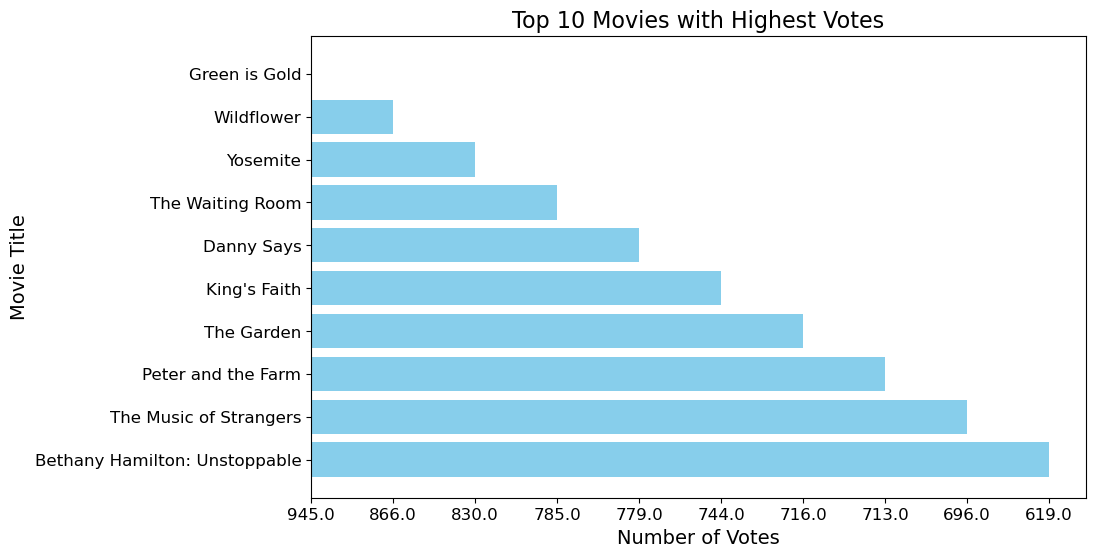

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_no_rows['MOVIES'], top_no_rows['VOTES'], color='skyblue')
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.title('Top 10 Movies with Highest Votes', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to display the movie with the most votes on top
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

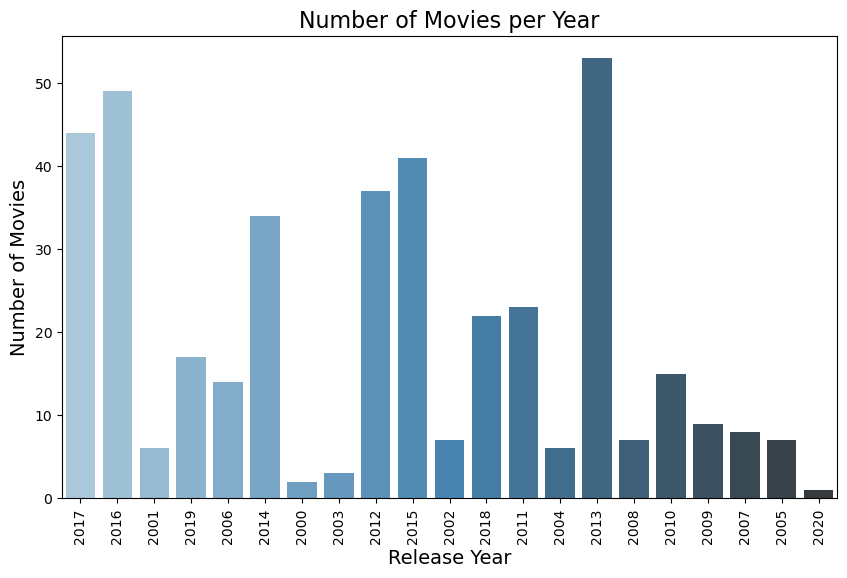

In [74]:
df_year = new_movie.copy()
df_year['RELEASE_YEAR_START'] = df_year['YEAR'].str.extract(r'(\d{4})')[0]
df_year['RELEASE_YEAR_END'] = df_year['YEAR'].str.extract(r'(\d{4})–(\d{4})')[1]
# Replacing NaN values in RELEASE_YEAR_START and RELEASE_YEAR_END with '0' (for movies with single years)
df_year['RELEASE_YEAR_START'].fillna('0', inplace=True)
df_year['RELEASE_YEAR_END'].fillna('0', inplace=True)
df_year = df_year[(df_year['RELEASE_YEAR_START'].astype(int) >= 2000) & (df_year['RELEASE_YEAR_END'].astype(int) <= 2023)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_year, x='RELEASE_YEAR_START', palette='Blues_d')
plt.title('Number of Movies per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sorting rows base on movies with high rate in the RATING column and store it in top_10_movies
top_10_movies = new_movie.sort_values(by='RATING', ascending=False).head(10)
top_10_movies

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
193,The Lord of the Rings: The Return of the King,(2003),"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,"Director:Peter Jackson| Stars:Elijah Wood, V...","1,691,777",201.0,0
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,0
260,The Lord of the Rings: The Two Towers,(2002),"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,529,752",179.0,0
3242,Be Here Now,(2015),"Documentary, Biography, Drama",8.6,"As though life is imitating art, actor and sex...","Director:Lilibet Foster| Stars:Jai Courtney,...","3,288",100.0,0
237,Sen to Chihiro no kamikakushi,(2001),"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",Director:Hayao Miyazaki| Stars:Daveigh Chase...,"682,809",125.0,0
132,The Departed,(2006),"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,Director:Martin Scorsese| Stars:Leonardo DiC...,"1,227,522",151.0,0
312,Kimi no na wa.,(2016),"Animation, Drama, Fantasy",8.4,Two strangers find themselves linked in a biza...,Director:Makoto Shinkai| Stars:Ryûnosuke Kam...,"217,433",106.0,0
491,Mononoke-hime,(1997),"Animation, Action, Adventure",8.4,On a journey to find the cure for a Tatarigami...,"Director:Hayao Miyazaki| Stars:Yôji Matsuda,...","359,473",134.0,0
5106,Blood Brother,(2013),Documentary,8.3,Documentarian visits best friend in India to s...,"Director:Steve Hoover| Stars:Rocky Braat, St...","1,618",92.0,0
570,Lawrence of Arabia,(1962),"Adventure, Biography, Drama",8.3,"The story of T.E. Lawrence, the English office...","Director:David Lean| Stars:Peter O'Toole, Al...","276,605",228.0,0


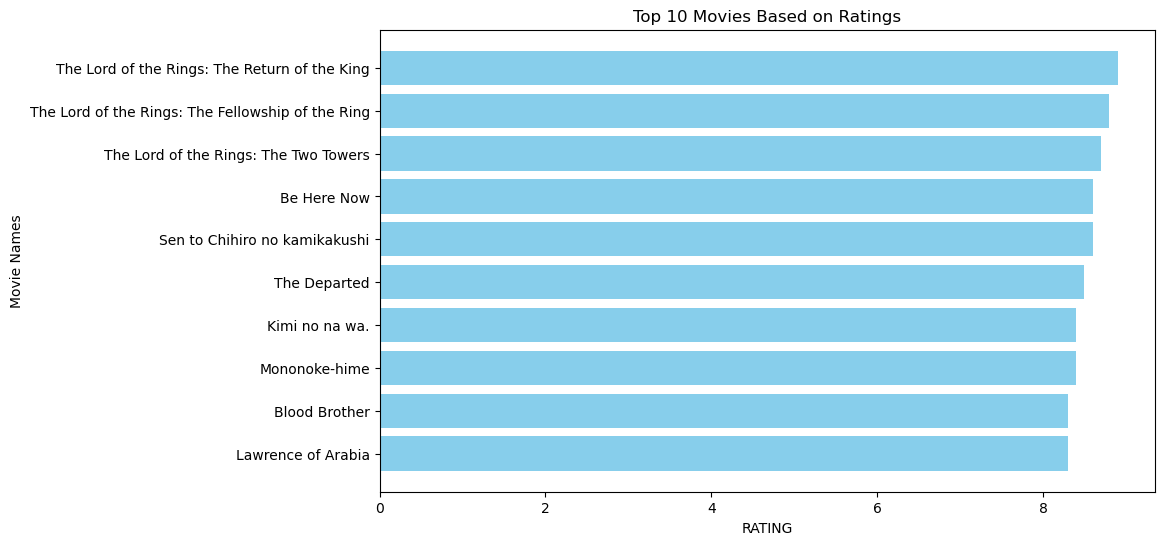

In [76]:
import matplotlib.pyplot as plt
# Plotting the top 10 movies based on ratings
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies['MOVIES'], top_10_movies['RATING'], color='skyblue')
plt.xlabel('RATING')
plt.ylabel('Movie Names')
plt.title('Top 10 Movies Based on Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3012015909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movie['RATING'] = pd.to_numeric(new_movie['RATING'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3012015909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movie['RunTime'] = pd.to_numeric(new_movie['RunTime'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3012015909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

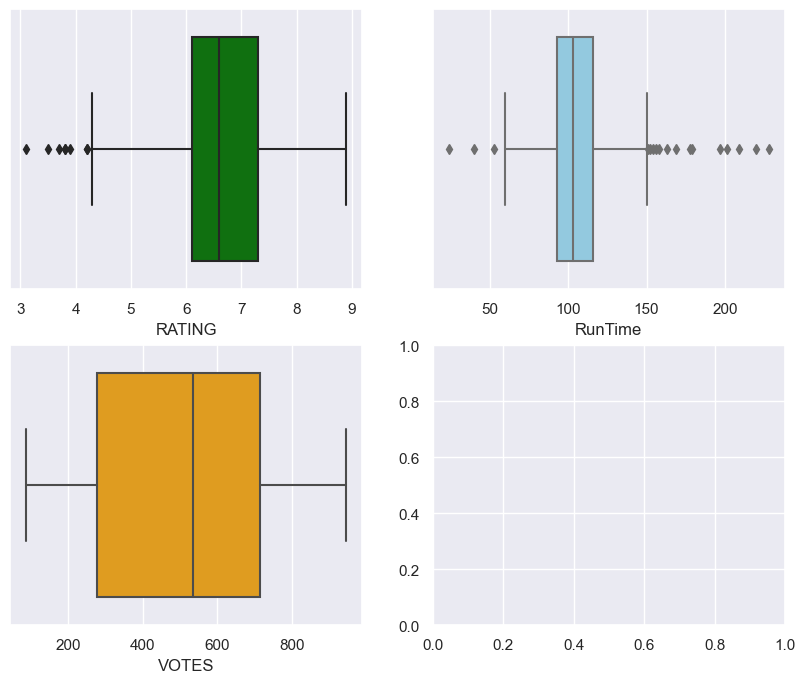

In [77]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

new_movie['RATING'] = pd.to_numeric(new_movie['RATING'], errors='coerce')
new_movie['RunTime'] = pd.to_numeric(new_movie['RunTime'], errors='coerce')
new_movie['VOTES'] = pd.to_numeric(new_movie['VOTES'], errors='coerce')

sns.boxplot(data=new_movie, x="RATING", ax=axs[0, 0], color='green')
sns.boxplot(data=new_movie, x="RunTime", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=new_movie, x="VOTES", ax=axs[1, 0], color='orange');
plt.show()

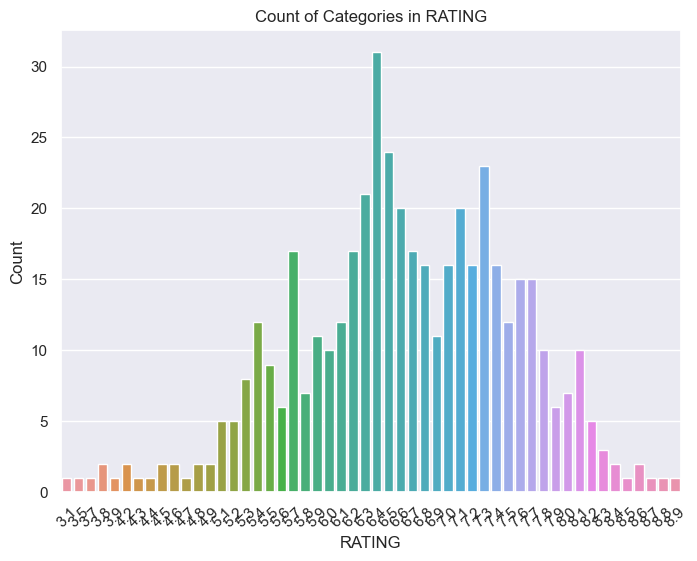

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RATING')
plt.title('Count of Categories in RATING')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

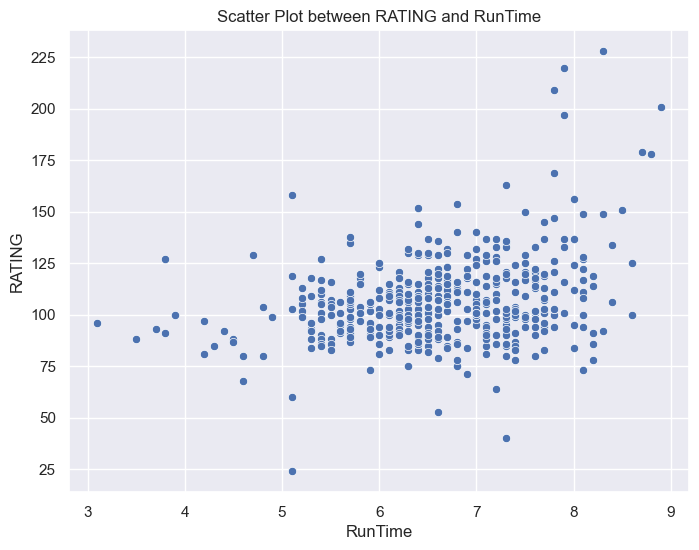

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RATING', y='RunTime')
plt.title('Scatter Plot between RATING and RunTime')
plt.xlabel('RunTime')
plt.ylabel('RATING')
plt.show()

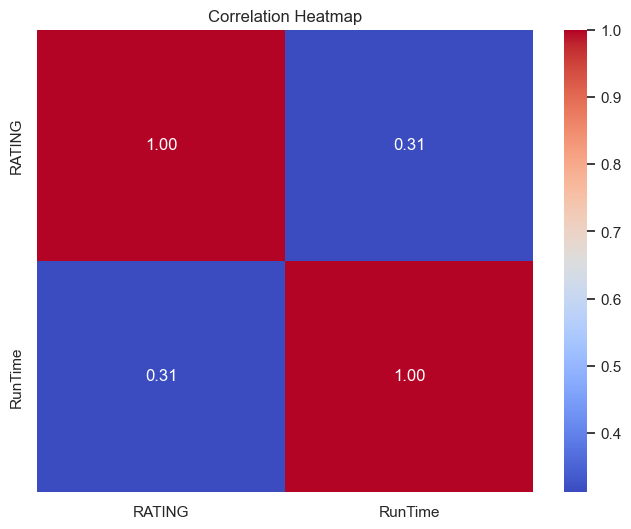

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# We DataFrame with 'RATING' and 'RunTime' columns, named data
df = df
# Calculate the correlation matrix
correlation = df[['RATING', 'RunTime']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. STATISTICS APPLICATION

In [42]:
#Libralies for STATISTICS APPLICATION
import numpy as np
from scipy import stats
import requests
import csv
import pandas as pd

%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\new_movie.csv")
df

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"205,979",118.0,0
1,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ...","897,444",127.0,0
2,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J...","237,601",88.0,0
3,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,0
4,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,...","99,351",99.0,0
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E...",245,90.0,0
456,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...,331,75.0,0
457,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,...",124,83.0,0
458,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos,111,86.0,0


In [82]:
df.describe() #desribe function is used to describe float and integer numeric columns

,RATING,RunTime,Gross
count,460.000000,460.000000,460.0
mean,6.638043,106.436957,0.0
std,0.940894,21.380930,0.0
min,3.100000,24.000000,0.0
25%,6.100000,93.000000,0.0
50%,6.600000,103.000000,0.0
75%,7.300000,116.000000,0.0
max,8.900000,228.000000,0.0


In [83]:
df.describe(include = ['object'])

,MOVIES,YEAR,CLEAN-GENRE,CLEAN-ONE-LINE,CLEAN-STARS,VOTES
count,460,460,460,460,460,460
unique,459,72,157,460,460,459
top,Beauty and the Beast,(2013),Documentary,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"6,897"
freq,2,47,26,1,1,2


In [84]:
df.mean()# to get the mean of numeric column

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\3051577957.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()# to get the mean of numeric column


RATING       6.638043
RunTime    106.436957
Gross        0.000000
dtype: float64

In [85]:
df.median()# to get the median of numeric column

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\1946081063.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()# to get the median of numeric column


RATING       6.6
RunTime    103.0
Gross        0.0
dtype: float64

In [86]:
df.mode()# to get the median of numeric column

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
0,Beauty and the Beast,(2013),Documentary,6.4,1921. An innocent immigrant woman is tricked i...,Director:Aaron Lieber| Stars:Alana Blanchard...,"6,897",100.0,0.0
1,NaN,NaN,NaN,NaN,A 12-year-old boy searches for the one thing t...,"Director:Adam Leon| Stars:Ty Hickson, Tashia...",NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,A 26-chapter anthology that showcases death in...,"Director:Adam Robitel| Stars:Taylor Russell,...",NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,A British medical doctor fights a cholera epid...,"Director:Adam Shankman| Stars:Mandy Moore, S...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A Brooklyn teenager juggles conflicting identi...,"Director:Adam Wingard| Stars:Sharni Vinson, ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
455,NaN,NaN,NaN,NaN,While settling his recently deceased father's ...,"Directors:Steve Brown, Jessie Deeter| Stars:...",NaN,NaN,NaN
456,NaN,NaN,NaN,NaN,"Who was General Tso, and why are we eating his...","Directors:Terry Gilliam, Terry Jones| Stars:...",NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,With his wife's disappearance having become th...,"Directors:Tom Gianas, Ross Shuman| Stars:Nic...",NaN,NaN,NaN
458,NaN,NaN,NaN,NaN,Young Ender Wiggin is recruited by the Interna...,"Directors:Yoshiyuki Momose, Akihiko Yamashita,...",NaN,NaN,NaN


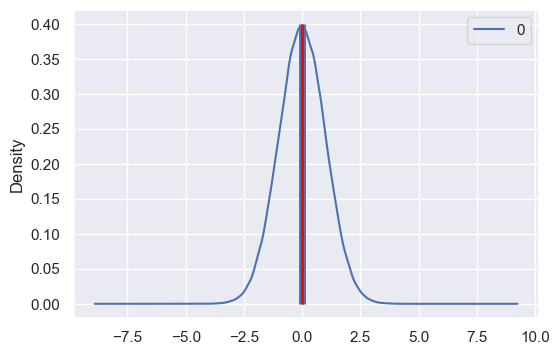

In [87]:
norm_data = pd.DataFrame(np.random.normal(size=100000))
norm_data.plot(kind="density",
              figsize=(6,4)) 
plt.vlines(norm_data.mean(),
          ymin=0,
          ymax=0.4,
          linewidth=5.0);
plt.vlines(norm_data.median(),
          ymin=0,
          ymax=0.4,
          linewidth=2.0,
          color="red");

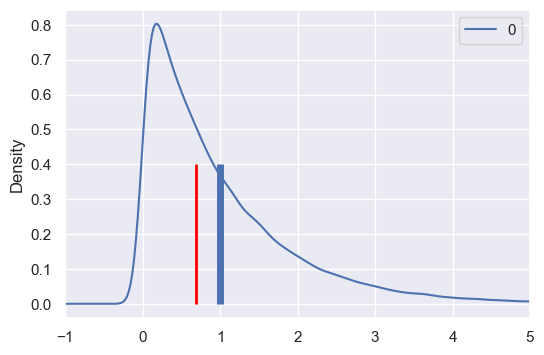

In [88]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))
skewed_data.plot(kind="density",
              figsize=(6,4),
              xlim =(-1,5)) 
plt.vlines(skewed_data.mean(),
          ymin=0,
          ymax=0.4,
          linewidth=5.0);
plt.vlines(skewed_data.median(),
          ymin=0,
          ymax=0.4,
          linewidth=2.0,
          color="red");

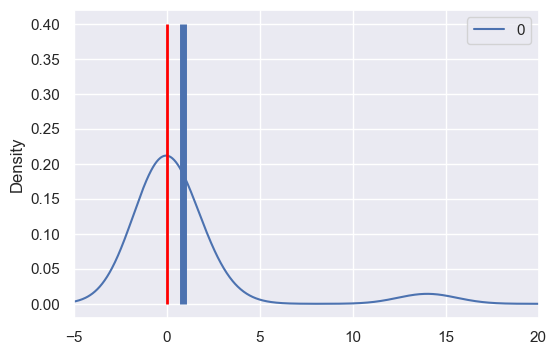

In [89]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)

combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(6,4),
              xlim =(-5,20)) 
plt.vlines(combined_data.mean(),
          ymin=0,
          ymax=0.4,
          linewidth=5.0);
plt.vlines(combined_data.median(),
          ymin=0,
          ymax=0.4,
          linewidth=2.0,
          color="red");

# Measure of spread

In [90]:
# to get the range of the rating column
max(df["RATING"])- min(df["RATING"])

5.800000000000001

In [91]:
# to get the range of the RunTime column
max(df["RunTime"])- min(df["RunTime"])

204.0

In [92]:
#A sumary of percentile can be used describe the spread of a variables
five_num=[df["RATING"].quantile(0),
    df["RATING"].quantile(0.25),
         df["RATING"].quantile(0.50),
         df["RATING"].quantile(0.75),
         df["RATING"].quantile(1),]
five_num

[3.1, 6.1, 6.6, 7.3, 8.9]

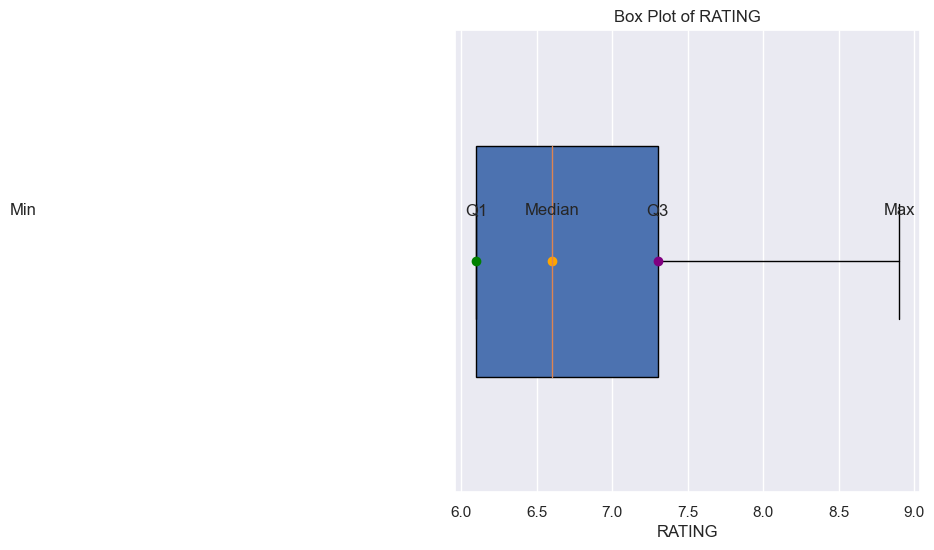

In [93]:
plt.figure(figsize=(6, 6))
plt.boxplot([five_num], vert=False, widths=0.5, patch_artist=True, showfliers=False)
# Add lines for minimum, maximum, Q1, Q3, and median
plt.scatter(five_num[1], 1, color='green', marker='o', zorder=2)  # Q1
plt.scatter(five_num[3], 1, color='purple', marker='o', zorder=2)  # Q3
plt.scatter(five_num[2], 1, color='orange', marker='o', zorder=2)  # Median

# Set labels for the custom elements
plt.text(five_num[0], 1.1, 'Min', horizontalalignment='center')
plt.text(five_num[4], 1.1, 'Max', horizontalalignment='center')
plt.text(five_num[1], 1.1, 'Q1', horizontalalignment='center')
plt.text(five_num[3], 1.1, 'Q3', horizontalalignment='center')
plt.text(five_num[2], 1.1, 'Median', horizontalalignment='center')

plt.xlabel('RATING')
plt.title('Box Plot of RATING')
plt.yticks([])  # Hide y-axis ticks and labels
plt.show()

In [94]:
df["RATING"].describe()#to get statistical description of RATING column

count    460.000000
mean       6.638043
std        0.940894
min        3.100000
25%        6.100000
50%        6.600000
75%        7.300000
max        8.900000
Name: RATING, dtype: float64

In [95]:
#to calculate the interquatile of RATING column
df["RATING"].quantile(0.75)-df["RATING"].quantile(0.25)

1.2000000000000002

In [96]:
df["RATING"].var()

0.8852815667329711

In [97]:
df["RATING"].std()

0.9408940252403408

In [98]:
# absolute deviation
abs_median_dev = abs(df["RATING"].median() -df["RATING"])
abs_median_dev.median()

0.6000000000000005

In [99]:
# skewnewness measure the skew or asymetry of the distribution 
df["RATING"].skew()

-0.47324228171020244

In [100]:
# kurtosis measure how much data in is in tail of the distribution
df["RATING"].kurt()

0.5125323257963372

In [101]:
#A samary of percentile can be used describe the spread of a variables
five_no=[df["RunTime"].quantile(0),
    df["RunTime"].quantile(0.25),
         df["RunTime"].quantile(0.50),
         df["RunTime"].quantile(0.75),
         df["RunTime"].quantile(1),]
five_no

[24.0, 93.0, 103.0, 116.0, 228.0]

In [102]:
df["RunTime"].describe()#to get statistical description of RunTime column

count    460.000000
mean     106.436957
std       21.380930
min       24.000000
25%       93.000000
50%      103.000000
75%      116.000000
max      228.000000
Name: RunTime, dtype: float64

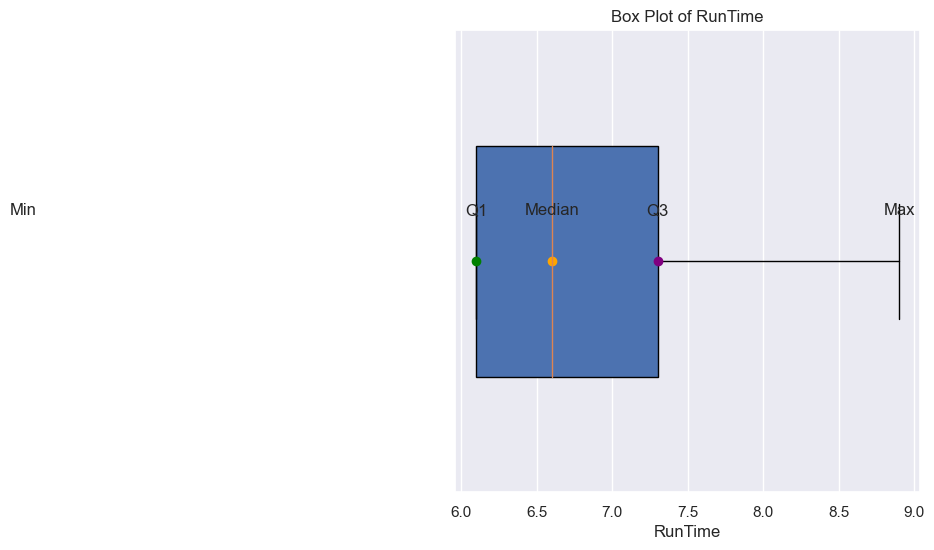

In [103]:
plt.figure(figsize=(6, 6))
plt.boxplot([five_num], vert=False, widths=0.5, patch_artist=True, showfliers=False)
# Add lines for minimum, maximum, Q1, Q3, and median
plt.scatter(five_num[1], 1, color='green', marker='o', zorder=2)  # Q1
plt.scatter(five_num[3], 1, color='purple', marker='o', zorder=2)  # Q3
plt.scatter(five_num[2], 1, color='orange', marker='o', zorder=2)  # Median

# Set labels for the custom elements
plt.text(five_num[0], 1.1, 'Min', horizontalalignment='center')
plt.text(five_num[4], 1.1, 'Max', horizontalalignment='center')
plt.text(five_num[1], 1.1, 'Q1', horizontalalignment='center')
plt.text(five_num[3], 1.1, 'Q3', horizontalalignment='center')
plt.text(five_num[2], 1.1, 'Median', horizontalalignment='center')

plt.xlabel('RunTime')
plt.title('Box Plot of RunTime')
plt.yticks([])  # H
plt.show()

In [104]:
#to calculate the interquatile of RunTime column
df["RunTime"].quantile(0.75)-df["RunTime"].quantile(0.25)

23.0

In [105]:
df["RunTime"].var()# to calculate the variance of RunTime 

457.1441650089988

In [106]:
df["RunTime"].std()

21.380929937890887

In [107]:
# absolute deviation an altenative measure of spread based on median
abs_median_dev = abs(df["RunTime"].median() -df["RunTime"])
abs_median_dev.median()

11.5

In [108]:
# skewnewness measure the skew or asymetry of the distribution 
df["RunTime"].skew()

1.4973427450773038

In [109]:
# kurtosis measure how much data in is in tail of the distribution
df["RunTime"].kurt()

6.480762904160068

In [110]:
norm_data = np.random.normal(size = 100000)
skewed_data = np.concatenate((np.random.normal(size = 35000)+2,
                            np.random.exponential(size = 65000)),
                            axis=0)

uniform_data =np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size = 50000),
                              np.random.exponential(size = 50000)*(-1)),
                             axis=0)

df =pd.DataFrame({"norm":norm_data,
                 "skewed":skewed_data,
                 "uniform":uniform_data,
                 "peaked":peaked_data})

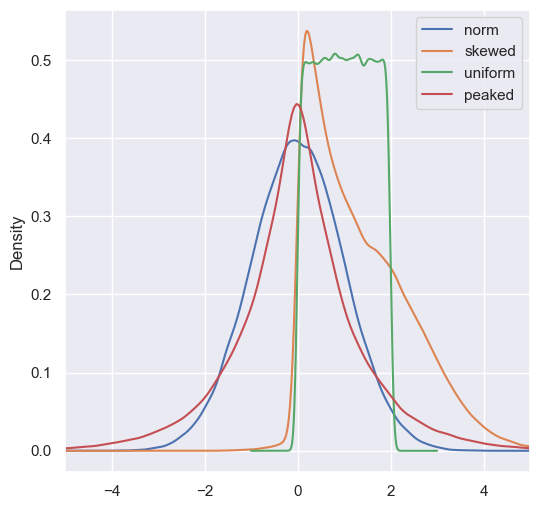

In [111]:
df.plot(kind = "density",
       figsize =(6,6),
       xlim =(-5,5));

In [112]:
df.skew()

norm      -0.000342
skewed     1.003862
uniform   -0.000840
peaked    -0.004931
dtype: float64

In [113]:
df.kurt()

norm      -0.004752
skewed     1.326033
uniform   -1.195197
peaked     3.014340
dtype: float64

In [213]:
import pandas as pd
movie = pd.read_csv(r"C:\Users\Admin\Downloads\new_movie.csv")
movie

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"205,979",118.0,0
1,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ...","897,444",127.0,0
2,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J...","237,601",88.0,0
3,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,0
4,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,...","99,351",99.0,0
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E...",245,90.0,0
456,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...,331,75.0,0
457,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,...",124,83.0,0
458,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos,111,86.0,0


# 5. MACHINE LEARNING

# Multiple regression technique to predict the gross/money the movie is likely to make

In [115]:
y_intercept = model.intercept_
print(f"Y-intercept: {y_intercept[0]}")

#why we need to get the y intercept of our model 
#The intercept is the starting point for the regression line.
#When all independent variables are zero, this is the value of the dependent variable

Y-intercept: 0.0


# Content-based recommendation system.

# A supervised machine learning algorithm we are using to recomemend movies

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Replace missing values (NaN) in the "GENRE" column with an empty string
movie["CLEAN-GENRE"].fillna("", inplace=True)


tfidf_vectorizer = TfidfVectorizer()
genre_matrix = tfidf_vectorizer.fit_transform(movie["CLEAN-GENRE"])

# Scale numerical features (RATING, RunTime, Gross)
scaler = MinMaxScaler()
numerical_features = movie[["RATING", "RunTime", "Gross"]]
scaled_numerical_features = scaler.fit_transform(numerical_features)

In [224]:
# Check the column names
print(movie.columns)

Index(['MOVIES', 'YEAR', 'CLEAN-GENRE', 'RATING', 'CLEAN-ONE-LINE',
       'CLEAN-STARS', 'VOTES', 'RunTime', 'Gross'],
      dtype='object')


In [225]:
import numpy as np

# Combine the feature vectors
movie_profiles = np.hstack([genre_matrix.toarray(), scaled_numerical_features])

In [226]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill NaN values in the movie_profiles matrix with zeros
movie_profiles = np.nan_to_num(movie_profiles)

# Calculate cosine similarity between movie profiles
movie_similarities = cosine_similarity(movie_profiles, movie_profiles)

In [227]:
first_five_movies = movie["MOVIES"].head(5)
print(first_five_movies)

0                               The Hitman's Bodyguard
1                                        Jurassic Park
2                                        Don't Breathe
3    The Lord of the Rings: The Fellowship of the Ring
4                                          Escape Room
Name: MOVIES, dtype: object


In [228]:
def get_movie_recommendations(movie_title, movie_similarities, top_n=5):
    movie_idx = movie[movie["MOVIES"] == movie_title].index[0]
    similar_movies = list(enumerate(movie_similarities[movie_idx]))
    similar_movies_sorted = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    top_similar_movies = similar_movies_sorted[1:top_n+1]  # Exclude the movie itself
    recommended_movies = [movie.iloc[movie_idx]["MOVIES"] for movie_idx, _ in top_similar_movies]

    return recommended_movies

# Example: Get recommendations for a movie
recommendations = get_movie_recommendations("Escape Room", movie_similarities)
print(recommendations)


['Annihilation', 'It', 'Jaws 2', 'Revenge', 'Big Game']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


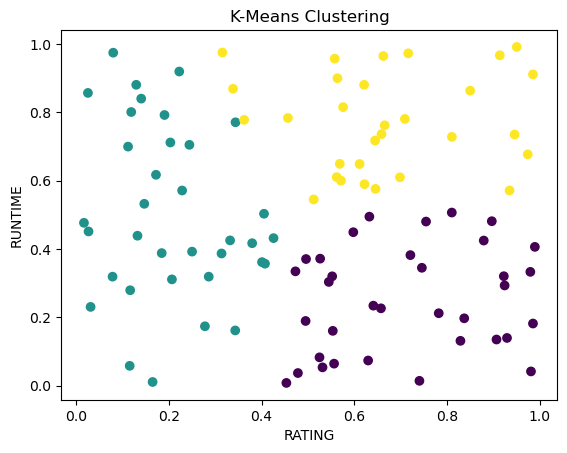

In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate random data points
df = np.random.rand(100, 2)

# Create and fit a K-Means clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Get cluster labels
labels = kmeans.labels_

# Plot the data points with different colors for each cluster
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis')
plt.xlabel('RATING')
plt.ylabel('RUNTIME')
plt.title('K-Means Clustering')
plt.show()

In [128]:
movie = pd.read_csv(r"C:\Users\Admin\Downloads\new_movie.csv")
movie

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"205,979",118.0,0
1,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ...","897,444",127.0,0
2,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J...","237,601",88.0,0
3,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,0
4,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,...","99,351",99.0,0
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E...",245,90.0,0
456,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...,331,75.0,0
457,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,...",124,83.0,0
458,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos,111,86.0,0


In [195]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preparation
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
movie = pd.read_csv(r"C:\Users\Admin\Downloads\DTA Ass1\new_movie.csv")


In [196]:
movie

,MOVIES,YEAR,CLEAN-GENRE,RATING,CLEAN-ONE-LINE,CLEAN-STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Reynolds...,"205,979",118.0,75.47
1,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,"Director:Steven Spielberg| Stars:Sam Neill, ...","897,444",127.0,402.45
2,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...","Director:Fede Alvarez| Stars:Stephen Lang, J...","237,601",88.0,89.22
3,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"Director:Peter Jackson| Stars:Elijah Wood, I...","1,713,028",178.0,315.54
4,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,"Director:Adam Robitel| Stars:Taylor Russell,...","99,351",99.0,57.01
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,"Director:Craig Teper| Stars:Beverly Adams, E...",245,90.0,0.09
456,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnula Flan...,331,75.0,0.00
457,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...","Director:Gotham Chopra| Stars:Deepak Chopra,...",124,83.0,0.01
458,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Padnos,111,86.0,0.01


In [197]:
# Filter columns based on data types in numerics list
numeric_columns = movie.select_dtypes(include=numerics)
numeric_columns=numeric_columns.fillna(movie_train.median()) #let's film the empty

# Select specific columns from the filtered DataFrame
selected_columns = numeric_columns[['RATING', 'RunTime', 'Gross']]

# Print the names of the selected columns
print("Selected Columns:")
print(selected_columns.columns)


Selected Columns:
Index(['RATING', 'RunTime', 'Gross'], dtype='object')


In [198]:
print(movie_train.columns)


Index(['norm', 'skewed', 'uniform', 'peaked'], dtype='object')


In [199]:

for column in movie.columns:
    data_type = movie[column].dtype
    print(f"Column '{column}' has data type: {data_type}")


Column 'MOVIES' has data type: object
Column 'YEAR' has data type: object
Column 'CLEAN-GENRE' has data type: object
Column 'RATING' has data type: float64
Column 'CLEAN-ONE-LINE' has data type: object
Column 'CLEAN-STARS' has data type: object
Column 'VOTES' has data type: object
Column 'RunTime' has data type: float64
Column 'Gross' has data type: float64


In [200]:

# Filter columns based on data types in numerics list
numeric_columns = movie.select_dtypes(include=numerics)

# Select specific columns from the filtered DataFrame
selected_columns = numeric_columns[['RATING', 'RunTime', 'Gross']]

# Print the names of the selected columns
print("Selected Columns:")
print(selected_columns.columns)



Selected Columns:
Index(['RATING', 'RunTime', 'Gross'], dtype='object')


In [201]:
#loading the training data set
X = numeric_columns.drop(['Gross'], axis=1)
y= numeric_columns['Gross'] #prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [202]:
#linear regression
lm = LinearRegression() #our 6th model
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.13871327027758573


In [203]:
#Our Linear Regression predicts the R 2 Square of  0.13871327027758573

In [204]:
#Let’s predict the model using Random Forrest

In [205]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)
y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: -2.10131488416884


In [206]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}  # 'ls' to 'squared_error'

clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train, y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")


Training Score: 0.6143690970119187


In [207]:
predictions2 = np.expand_dims(clf.predict(X_test), axis=1)
MSE= mean_squared_error(y_test,predictions2)
r2= clf.score(X_test,y_test)
print(f"MSE: {MSE},R2: {r2}")

MSE: 6413.104386428319,R2: -0.15301539305156608


In [210]:
#prediction for the data
revenue_predictions= clf.predict(X_test)
gbr_predictions =pd.DataFrame(revenue_predictions,columns=['Predicted Gross/Money'])
gbr_predictions.tail()

,Predicted Gross/Money
110,35.160417
111,34.794901
112,12.178145
113,40.051818
114,34.874545


In [209]:

column_index = 0 

# Access the column by its index
selected_column = X_test.iloc[:, column_index]

# Print the selected column
print(selected_column)


67     6.4
146    7.1
324    5.9
437    6.4
224    6.2
      ... 
298    6.4
191    6.5
378    7.0
341    7.5
232    6.2
Name: RATING, Length: 115, dtype: float64


In [194]:
print(movie.columns)


Index(['MOVIES', 'YEAR', 'CLEAN-GENRE', 'RATING', 'CLEAN-ONE-LINE',
       'CLEAN-STARS', 'VOTES', 'RunTime', 'Gross'],
      dtype='object')


In [229]:
# Assuming you've already trained your linear regression model (lm)
y_intercept = lm.intercept_

print("Y-Intercept:", y_intercept)


Y-Intercept: -131.3811703189235


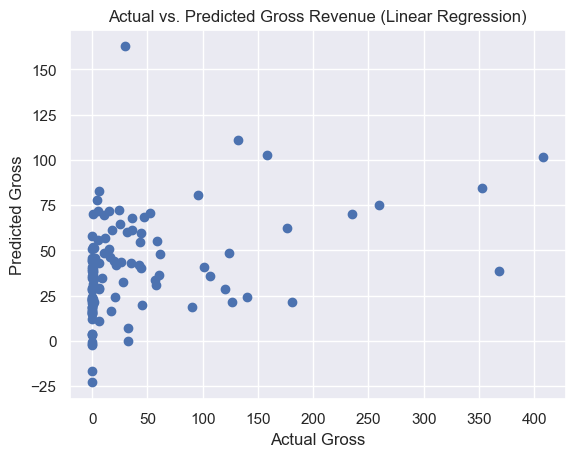

In [230]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, lm_preds)
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs. Predicted Gross Revenue (Linear Regression)")
plt.grid(True)
plt.show()
